# <font color='blue'>Data Science Academy</font>

## <font color='blue'>Fundamentos de Linguagem Python Para Análise de Dados e Data Science</font>

## <font color='blue'>Projeto 2</font>

## <font color='blue'>Análise Exploratória de Dados em Linguagem Python Para a Área de Varejo</font>

![DSA](imagens/projeto2.png)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.12.7


In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [4]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [4]:
# Shape
df_dsa.shape

(9700, 11)

In [5]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [6]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [7]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [8]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [9]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [10]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [11]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [12]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


## Pergunta de Negócio 1:

### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [43]:
cidade_venda = df_dsa[df_dsa['Categoria'] == 'Office Supplies'].groupby('Cidade', as_index=False)['Valor_Venda'].sum()
cidade_venda_ordem = cidade_venda.sort_values(by='Valor_Venda', ascending=False).iloc[0]['Cidade']
print(f'A cidade com maior venda é: {cidade_venda_ordem}')

A cidade com maior venda é: New York City


## Pergunta de Negócio 2:

### Qual o Total de Vendas Por Data do Pedido?

Demonstre o resultado através de um gráfico de barras.

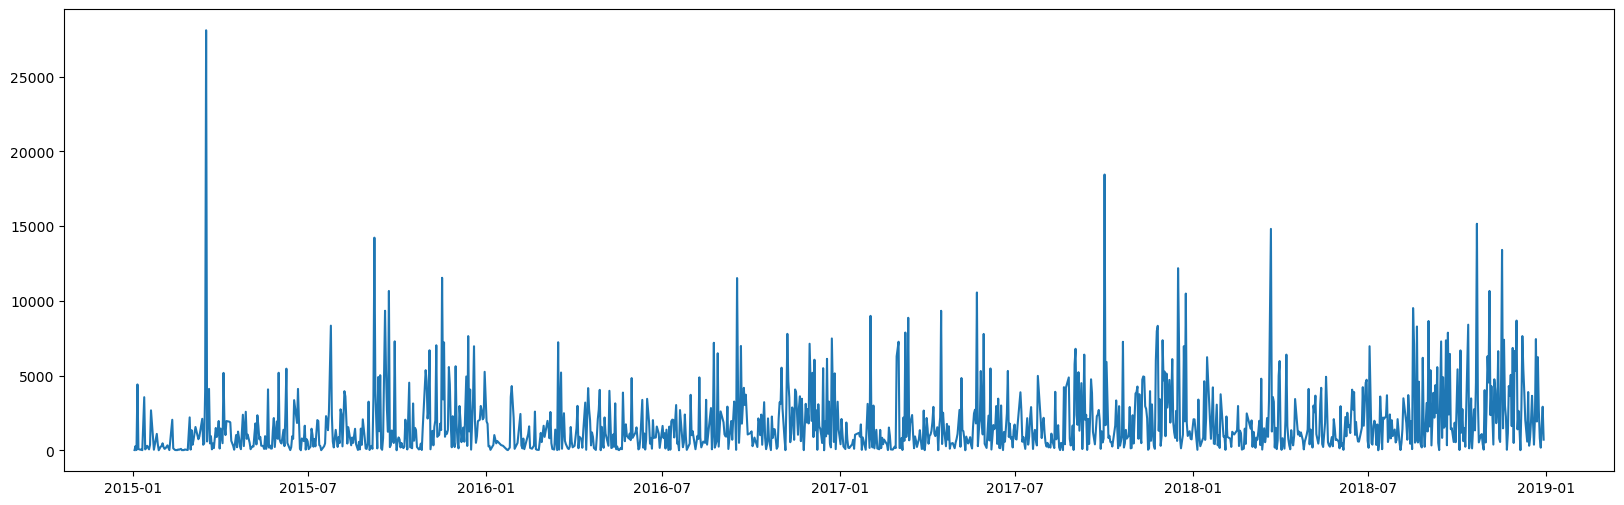

In [60]:
df_dsa['Data_Pedido'] = pd.to_datetime(df_dsa['Data_Pedido'], format = "%d/%m/%Y")
x = df_dsa.groupby('Data_Pedido', as_index=False)['Valor_Venda'].sum()
y = x.sort_values(by='Data_Pedido', ascending= False)
plt.figure(figsize=(20,6))
plt.plot(y['Data_Pedido'], y['Valor_Venda'])

## Pergunta de Negócio 3:

### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [61]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


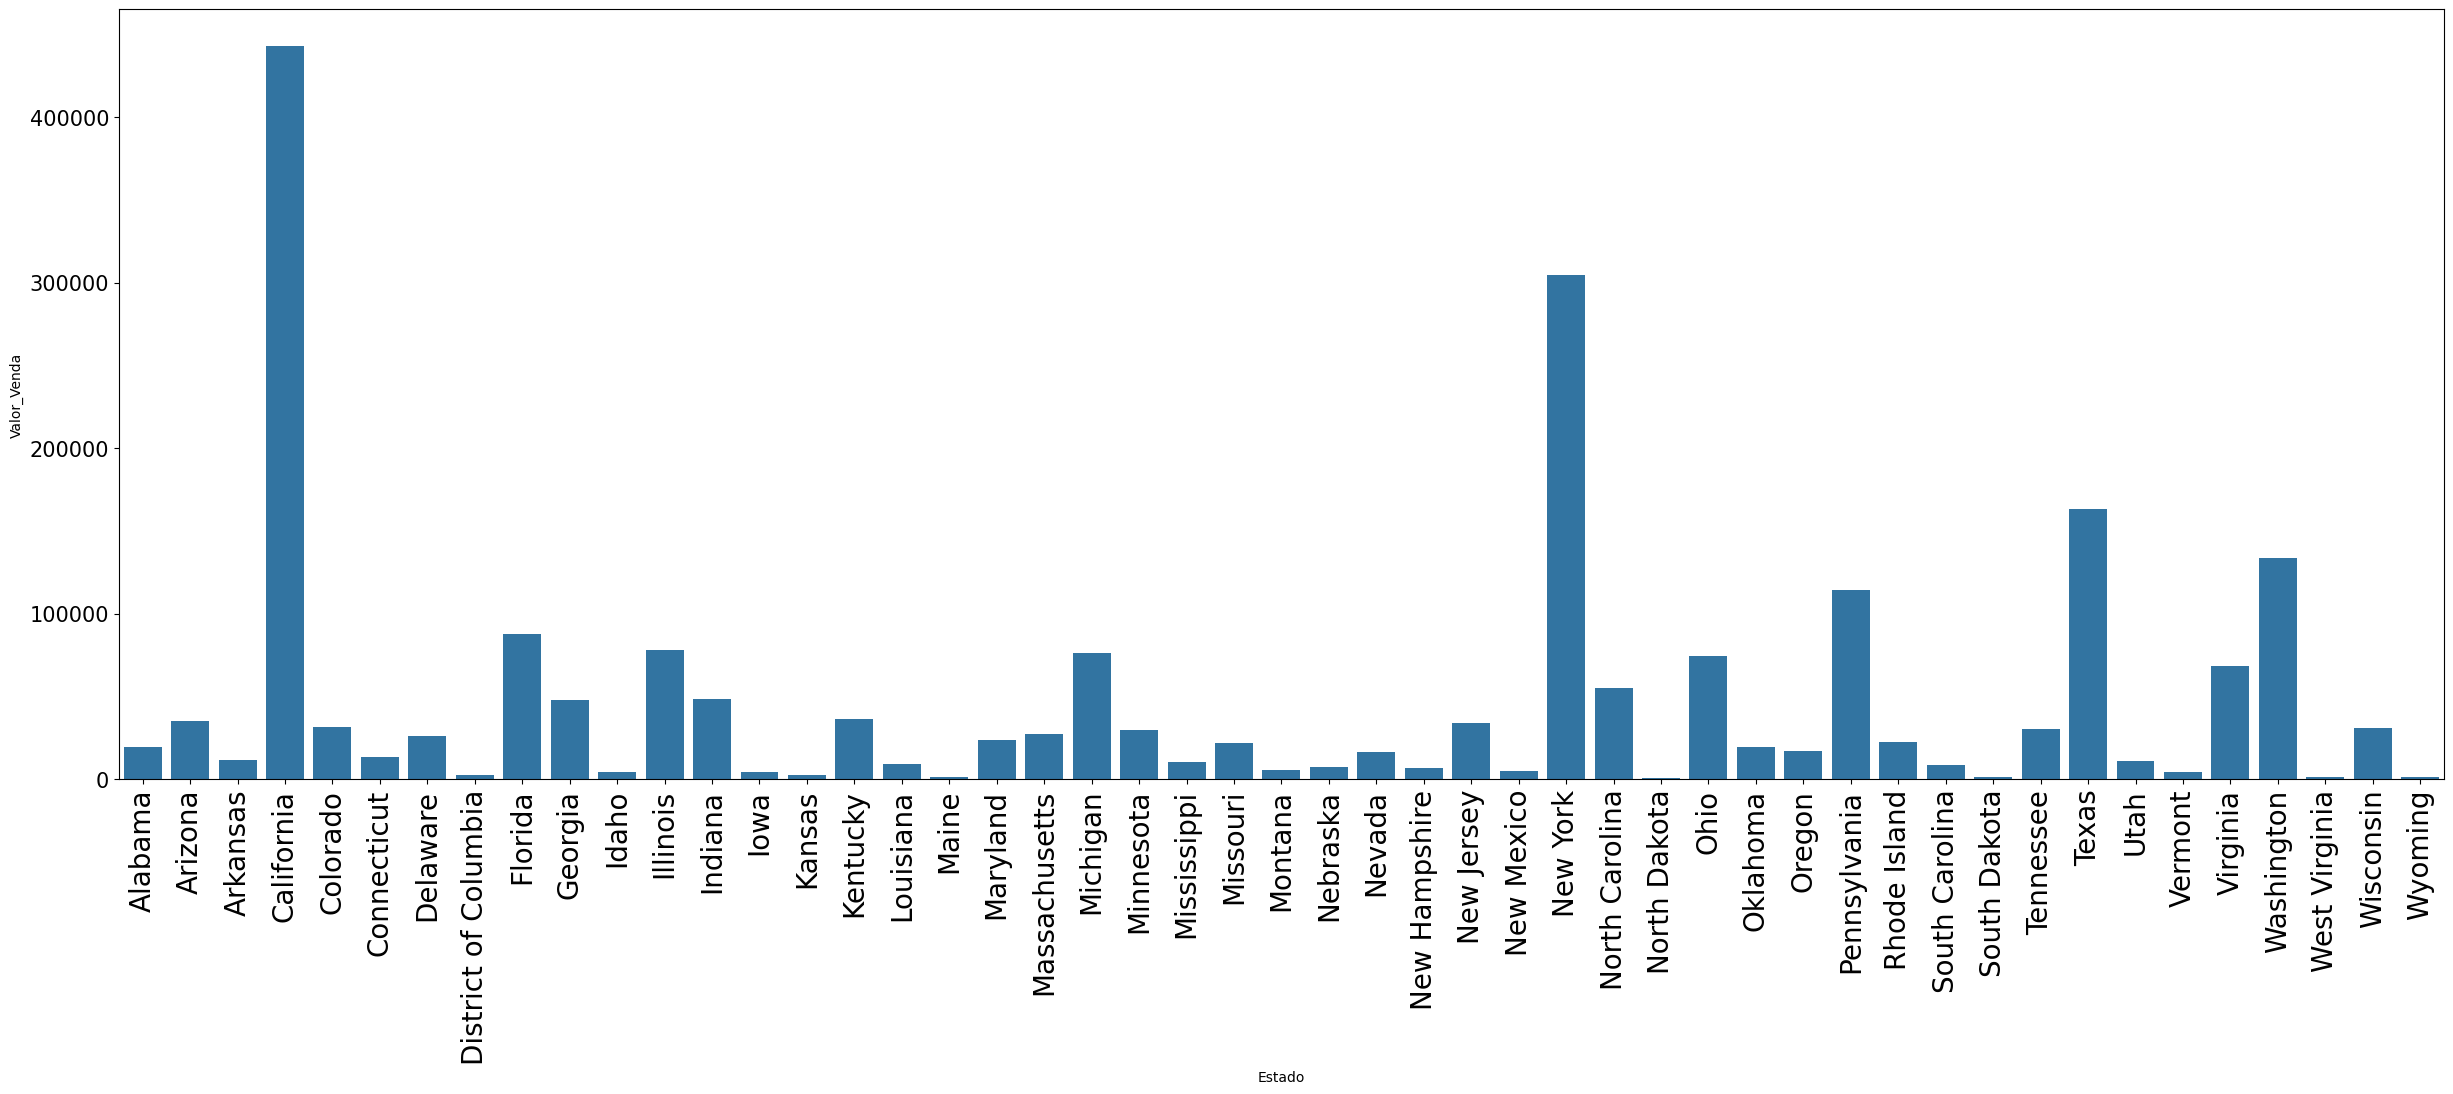

In [76]:
bar_chart = df_dsa.groupby('Estado', as_index=False)['Valor_Venda'].sum()
plt.figure(figsize=(30,10))
sns.barplot(data = bar_chart, x=bar_chart['Estado'], y=bar_chart['Valor_Venda'])
plt.xticks(rotation = 90, size=20)
plt.yticks(size = 15)
plt.show()


## Pergunta de Negócio 4:

### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

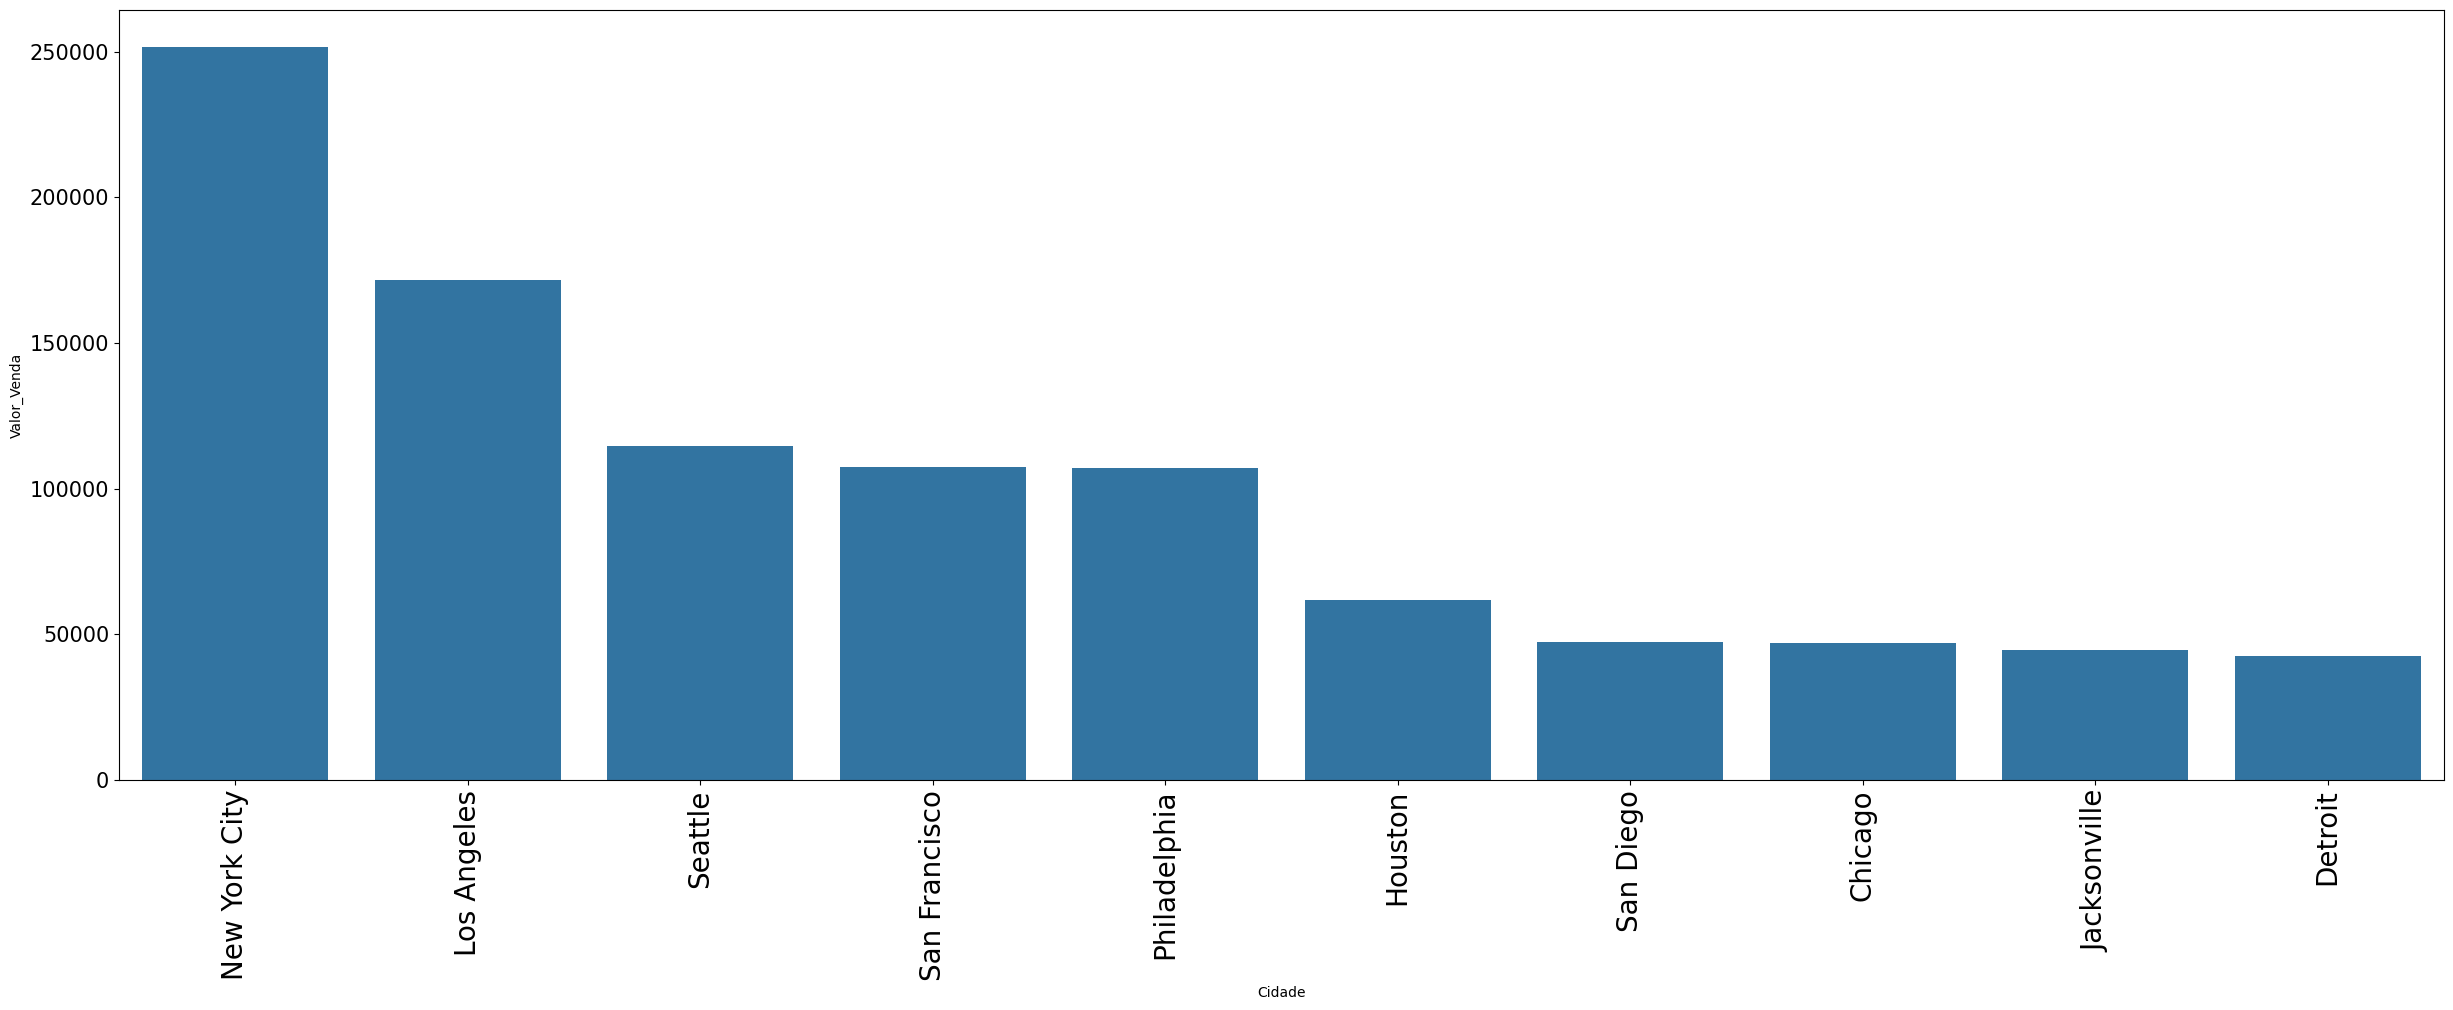

In [86]:
bar_chart = df_dsa.groupby('Cidade', as_index=False)['Valor_Venda'].sum()
bar_chart_ordem = bar_chart.sort_values('Valor_Venda', ascending=False)
bar_chart_ordem = bar_chart_ordem.head(10)
plt.figure(figsize=(30,10))
sns.barplot(data = bar_chart_ordem, x=bar_chart_ordem['Cidade'], y=bar_chart_ordem['Valor_Venda'])
plt.xticks(rotation = 90, size=20)
plt.yticks(size = 15)
plt.show()

## Pergunta de Negócio 5:

### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

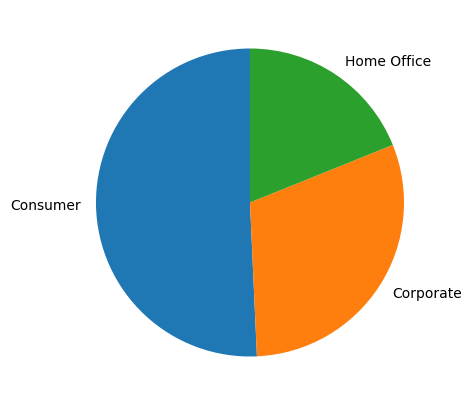

In [95]:
segmento_vendas = df_dsa.groupby('Segmento', as_index=False)['Valor_Venda'].sum()
plt.figure(figsize=(5,5))
plt.pie(segmento_vendas['Valor_Venda'], labels=segmento_vendas['Segmento'], startangle=90)
plt.show()

## Pergunta de Negócio 6 (Desafio Nível Baby):

### Qual o Total de Vendas Por Segmento e Por Ano?

In [101]:
df_dsa['Ano'] = df_dsa['Data_Pedido'].dt.year
domanda6 = df_dsa.groupby(['Segmento', 'Ano'], as_index=False)['Valor_Venda'].sum()
print(domanda6)

       Segmento   Ano  Valor_Venda
0      Consumer  2015  256719.9166
1      Consumer  2016  265295.2593
2      Consumer  2017  288459.5572
3      Consumer  2018  323359.6019
4     Corporate  2015  125819.5957
5     Corporate  2016  114643.1229
6     Corporate  2017  203266.7398
7     Corporate  2018  235502.7284
8   Home Office  2015   88229.0878
9   Home Office  2016   74134.1332
10  Home Office  2017  103639.6270
11  Home Office  2018  156488.5849


## Pergunta de Negócio 7 (Desafio Nível Júnior):

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [106]:
domanda7 = (df_dsa['Valor_Venda'] > 1000).sum()
print(f'Teríamos um total de {domanda7} vendas com desconto de 15%')

Teríamos um total de 457 vendas com desconto de 15%


## Pergunta de Negócio 8 (Desafio Nível Master):

### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [113]:
df_dsa['Desconto'] = np.where(df_dsa['Valor_Venda'] > 1000, 0.15, 0.10)
df_dsa['Valor_Venda_Desconto'] = df_dsa['Valor_Venda'] * (1-df_dsa['Desconto'])
print(df_dsa.groupby('Desconto',as_index=False)['Valor_Venda'].mean())
print(df_dsa.groupby('Desconto',as_index=False)['Valor_Venda_Desconto'].mean())



   Desconto  Valor_Venda
0      0.10   137.204023
1      0.15  2116.807815
   Desconto  Valor_Venda_Desconto
0      0.10            123.483621
1      0.15           1799.286643


## Pergunta de Negócio 9 (Desafio Nível Master Ninja):

### Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?

Demonstre o resultado através de gráfico de linha.

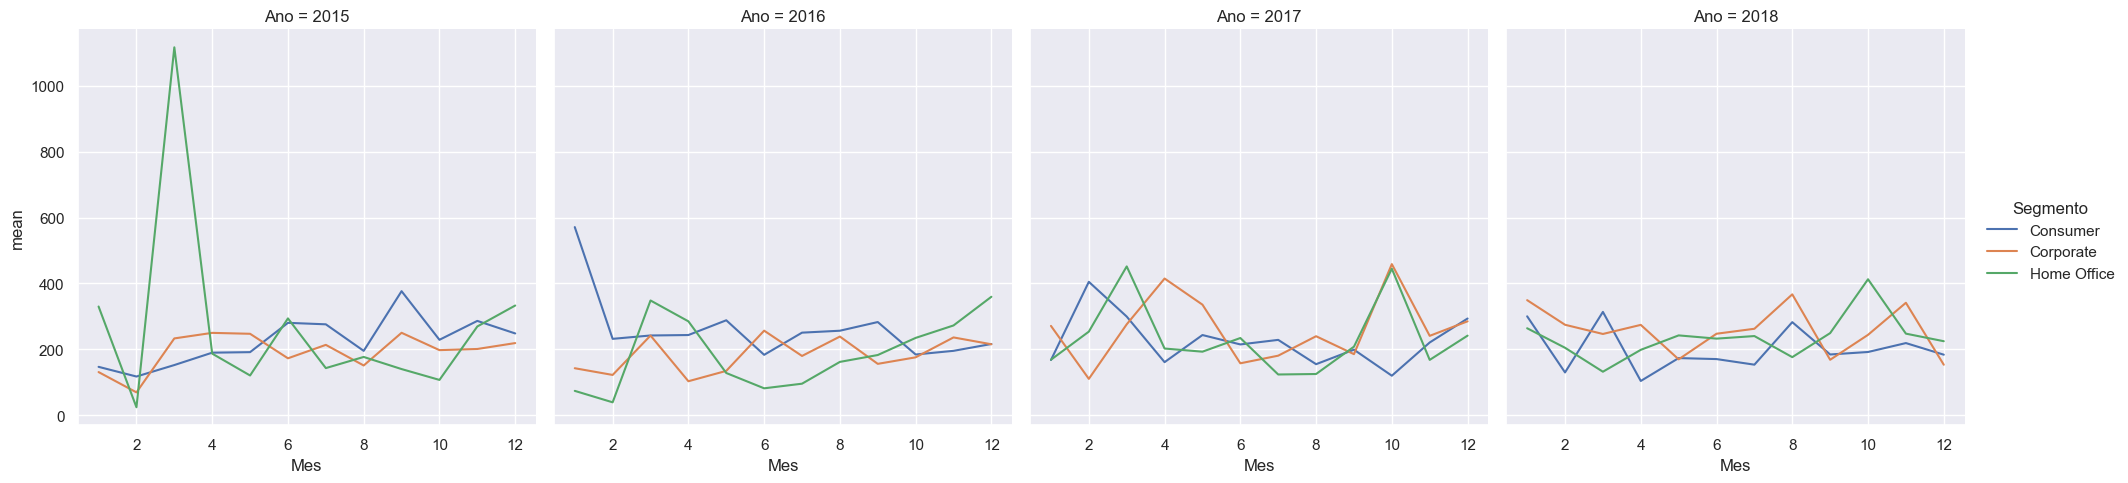

In [130]:
df_dsa['Mes'] = df_dsa['Data_Pedido'].dt.month


base = df_dsa.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg(['sum', 'mean', 'median'])


anos = base.index.get_level_values(0)
meses = base.index.get_level_values(1)
segmentos = base.index.get_level_values(2)

sns.set()
plt.Figure(figsize=(12,6))
fig1 = sns.relplot(kind='line',
                   data = base,
                   y = 'mean',
                   x = meses,
                   hue = segmentos,
                   col = anos)
plt.show()



## Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):

### Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? 

Demonstre tudo através de um único gráfico.

In [139]:
base1 = df_dsa.groupby(['Categoria','SubCategoria']).sum(numeric_only = True).sort_values('Valor_Venda', ascending = False).head(12)

base1 = base1[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

base2 = base1.groupby('Categoria').sum(numeric_only = True).reset_index()

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


In [141]:
cores_categorias = ['#5d00de', '#0ee84f', '#e80e27']
cores_subcategorias = ['#aa8cd4', '#aa8cd5','#aa8cd6', '#aa8cd7', '#26c957', '#26c958', '#26c959', '#26c960', '#e65e65', '#e65e66', '#e65e67', '#e65e68']


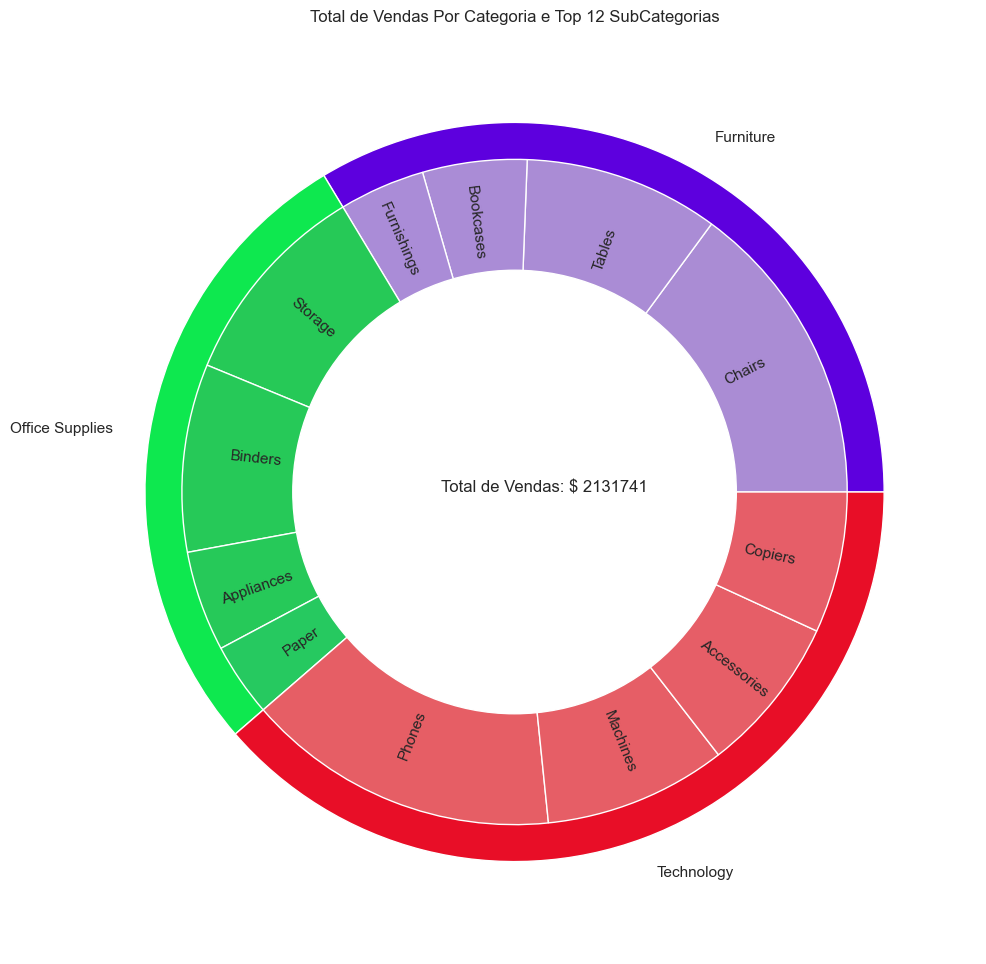

In [147]:
fig, ax = plt.subplots(figsize = (18,12))

p1 = ax.pie(base2['Valor_Venda'], 
            radius = 1,
            labels = base2['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)


p2 = ax.pie(base1['Valor_Venda'],
            radius = 0.9,
            labels = base1['SubCategoria'],
            #autopct = base1['Valor_Venda'],
            colors = cores_subcategorias, 
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'), 
            pctdistance = 0.53,
            rotatelabels = True)

centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')


fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(base1['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()

# Fim